# DATA1030 
## Homework 3: Data modeling and SQL for IMDB data
## Due December 9, 11:59 pm
You may work on this HW solo or with one partner.  If you work with a partner, be sure to include both your names below.

### Student #1: HANGYU LIU
### Student #2: JIAHENG WEI
***

## Overview

A company named MOVIE GEN Corp. needs your help to create and access a movie database. You are interested in helping them create this database. In this assignment, you will load the IMDB data into a database and run queries on it to retrieve records. 

** OBJECTIVE **

In this assignment, you will first examine some flat data and develop an appropriate schema to efficiently represent that data in a SQL database.  You will then create that database, use Python to read and reformat the data and then use SQL commands to populate that database in an appropriate manner. Finally, you will query the database using different approaches and optimizations.

**Skills**

1. Model data using star schema
2. Use SQL to create and update a database 
3. Run SQL to retrieve records for your customers and present them visually
4. Learn about improving performance via temporary tables and indexes

## Part 1: Data modeling

Build a **[star schema](https://en.wikipedia.org/wiki/Star_schema)** for the data contained in `all_data.csv`.

Let's first read the csv file and examine its contents.  The strings in `all_data.csv` use the `encoding="latin1"` character encoding option when you read in this file using `pandas`.

**Task 0**
Read in the data and use the panda's head method to display the first 5 rows.

In [1]:
#BEGIN_SOLUTION
import pandas as pd
IMDB_data = pd.read_csv('all_data.csv', encoding="latin1")
IMDB_data.head(5)
#END_SOLUTION

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Gore Verbinski,302.0,169.0,563,1000,Orlando Bloom,40000,309404152.0,Action,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000,7.1,2.35,0
1,Christopher Nolan,813.0,164.0,22000,23000,Christian Bale,27000,448130642.0,Action,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000,8.5,2.35,164000
2,Andrew Stanton,462.0,132.0,475,530,Samantha Morton,640,73058679.0,Action,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632,6.6,2.35,24000
3,Nathan Greno,324.0,100.0,15,284,Donna Murphy,799,200807262.0,Adventure,Brad Garrett,...,387.0,English,USA,PG,260000000.0,2010.0,553,7.8,1.85,29000
4,David Yates,375.0,153.0,282,10000,Daniel Radcliffe,25000,301956980.0,Adventure,Alan Rickman,...,973.0,English,UK,PG,250000000.0,2009.0,11000,7.5,2.35,10000


In [2]:
IMDB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 25 columns):
director_name                3023 non-null object
num_critic_for_reviews       3023 non-null float64
duration                     3023 non-null float64
director_facebook_likes      3023 non-null int64
actor_3_facebook_likes       3023 non-null int64
actor_2_name                 3023 non-null object
actor_1_facebook_likes       3023 non-null int64
gross                        3023 non-null float64
genres                       3023 non-null object
actor_1_name                 3023 non-null object
movie_title                  3023 non-null object
num_voted_users              3023 non-null int64
cast_total_facebook_likes    3023 non-null int64
actor_3_name                 3023 non-null object
facenumber_in_poster         3023 non-null float64
num_user_for_reviews         3023 non-null float64
language                     3023 non-null object
country                      3023 non-null 

There are 25 columns in the csv file.  

**TASK 1:** Draw a **[star schema](https://en.wikipedia.org/wiki/Star_schema)** for this dataset, save your drawing as an image and attach it to the cell below.  


Note: We recommended using Google Drawings. Google Drawings is an online image creator that can be used to draw the Schema, and is what the TAs used to create the Schema in the solution.

Hints:
1. Your star schema should be composed of one fact table and three dimension tables. 
1. For each table, underline primary key.
1. Specify data types for each item.
1. Draw 1:N, N:1, N:N or 1:1 on each connecting line to indicate the [cardinality](https://en.wikipedia.org/wiki/One-to-many_(data_model)) of the relationship.
1. Your fact table should only contain references to the other tables.
1. Including image in markdown is easy, see [here](https://stackoverflow.com/questions/255170/markdown-and-image-alignment).

### BEGIN SOLUTION
<img style="float: right;" src="star scheme.png">
### END SOLUTION

## Part 2: Database creation
 
In this part, we will create a [SQLite3 database](https://docs.python.org/3/library/sqlite3.html). This part is really similar to what we saw in lab and lecture.

The first thing you'll need to do when interacting with a SQLite database (and generally any SQL databases) is to open up a connection (see below). If the database doesn't exist, the SQLite3 module will create one.

In [3]:
import sqlite3
import csv
conn = sqlite3.connect('movie.db')
c = conn.cursor()

**TASK 2:** Fill in function `create_movie_database` with the following sections.

- [Drop all existing tables](http://www.sqlitetutorial.net/sqlite-drop-table/) in the database. Doing this will allow us to simply re-run the script if we want to try a new schema.
- [Create the tables](http://www.sqlitetutorial.net/sqlite-create-table) according to your star schema. 
- Your dimension tables should not contain any duplicate rows.
- Use the SQL `UNIQUE` (http://www.sqlitetutorial.net/sqlite-unique-constraint/) column constraint to enforce this fact.

**Note:** 

- To execute queries, simply run the `cursor.execute()` with your SQL statement as the argument.
- Remember to to run 'conn.commit()' in order to commit (i.e. save) your changes.
- Remember to define PRIMARY KEYs and FOREIGN KEYs in your table, refer to [here](http://www.sqlitetutorial.net/sqlite-primary-key/).
- Remember to commit the connection to save changes.

In [4]:
def create_movie_database(conn):
    """
    Using the database connection conn, create tables appropriate for 
    storing and using IMDB data.  Drops any pre-exsiting tables that would be re-defined by this procedure.
    """
    c = conn.cursor()
    
    ### BEGIN SOLUTION
    # Drop tables if they exist
    c.execute("DROP TABLE IF EXISTS facts")
    c.execute("DROP TABLE IF EXISTS movies")
    c.execute("DROP TABLE IF EXISTS directors")
    c.execute("DROP TABLE IF EXISTS actors")
    # Enable foreign key check
    c.execute("PRAGMA foreign_keys=1")
    # Create database tables
    c.execute('''CREATE TABLE facts (
               movie_id INTEGER NOT NULL, 
               director_id INTEGER NOT NULL, 
               actor_1_id INTEGER NOT NULL, 
               actor_2_id INTEGER NOT NULL, 
               actor_3_id INTEGER NOT NULL,
               PRIMARY KEY(movie_id, director_id, actor_1_id, actor_2_id, actor_3_id),
               FOREIGN KEY(movie_id) REFERENCES movies(movie_id),
               FOREIGN KEY(director_id) REFERENCES directors(director_id),
               FOREIGN KEY(actor_1_id) REFERENCES actors(actor_id),
               FOREIGN KEY(actor_2_id) REFERENCES actors(actor_id),
               FOREIGN KEY(actor_3_id) REFERENCES actors(actor_id)
               )''')
    c.execute('''CREATE TABLE movies (
               movie_id INTEGER PRIMARY KEY NOT NULL, 
               movie_title TEXT, 
               duration REAL, 
               gross REAL, 
               genres TEXT,
               num_voted_users INTEGER,
               num_critic_for_reviews INTEGER,
               cast_total_facebook_likes INTEGER,
               facenumber_in_poster INTEGER,
               num_user_for_reviews INTEGER,
               language TEXT,
               country TEXT,
               content_rating TEXT,
               budget REAL,
               title_year INTEGER,
               imdb_score REAL,
               aspect_ratio REAL,
               movie_facebook_likes INTEGER
               )''')
    c.execute('''CREATE TABLE directors (
               director_id INTEGER PRIMARY KEY NOT NULL, 
               director_name TEXT, 
               director_facebook_likes INTEGER)''')
    c.execute('''CREATE TABLE actors (
               actor_id INTEGER PRIMARY KEY NOT NULL, 
               actor_name TEXT, 
               actor_facebook_likes INTEGER)''')
    # Commit changes
    conn.commit()
    ### END SOLUTION

create_movie_database(conn)

Now, you should be able to view the sqlite3 database which you had created in your assignment directory. Play around with the database! 

You can connect to a sqlite3 database via terminal with the following command:

~~~~
sqlite3 movie.db
~~~~

To see the schema of your table, you can run the following command:

~~~~
.schema
~~~~

You can execute arbitrary SQL commands from the `sqlite>` prompt.
More info on your other options can be found here.

~~~~
.help
~~~~

Finally, to exit from a sqlite3 database use the following command:

~~~~
.exit
~~~~

## Part 3: Database update

In **lab** and **lecture** we provided you with two different csv files, one for each table. However, this isn't how real world data is typically structured when you first receive it. 

Often, you will receive a single data "dump" file. As a data scientist, you need to figure out how to split it into different tables, and insert the information into a database. 

**Task 3:** Fill in function `update_database` to insert the csv file contents into the movie database. The idea here is to write update_database in such a way that it can be used to append additional data to a pre-exisiting database.  Use the code skeleton below to populate your database dimension and fact table one row at a time using c.execute.  **Do not use Pandas.to_sql** or do any preprocessing in pandas.

Hints: 
1. Populate the dimension tables first.
2. When SQLite throws an error, for example, sqlite3.IntegrityError, you can catch the error with `try except` statement.  The statement below ignores sqlite3.IntegrityError errors.

```            
            try:
                c.execute(sql_string)
            except sqlite3.IntegrityError:
                pass
```

2. In order to populate the fact table you will need to query them in order to retrieve the each dimension row id. Here is some SQL code that does this that you are welcome to use.

```
INSERT INTO facts 
                SELECT m.movie_id, d.director_id, a1.actor_id, a2.actor_id, a3.actor_id
                FROM movies m, directors d, actors a1, actors a2, actors a3
                WHERE m.movie_title = ? AND d.director_name = ? AND a1.actor_name = ? 
                AND a2.actor_name = ? AND a3.actor_name = ?
```

Below is a listing of column definitions that you might find helpful.

~~~~
0 director_name
1 num_critic_for_reviews
2 duration
3 director_facebook_likes
4 actor_3_facebook_likes
5 actor_2_name
6 actor_1_facebook_likes
7 gross
8 genres
9 actor_1_name
10 movie_title
11 num_voted_users
12 cast_total_facebook_likes
13 actor_3_name
14 facenumber_in_poster
15 num_user_for_reviews
16 language
17 country
18 content_rating
19 budget
20 title_year
21 actor_2_facebook_likes
22 imdb_score
23 aspect_ratio
24 movie_facebook_likes
~~~~

In [5]:
def update_database(csv_file, conn):
    '''update movie database using contents of csv_file and database connection conn.'''
    
    reader = csv.reader(open(csv_file, encoding='latin1'))
    next(reader, None)
    c = conn.cursor()
    i = 1
    j = 1
    k = 1
    for row in reader:
        row = [item.lower() for item in row]
        
        #
        # insert into dimension tables
        #
 
        ### BEGIN SOLUTION
        # insert directors table
        sql_dir_check = '''SELECT * FROM directors WHERE director_name = ?'''
        if  not c.execute(sql_dir_check,[row[0]]).fetchall():
            c.execute('''INSERT INTO directors (director_id, director_name, director_facebook_likes)
               VALUES (?, ?, ?)''',
               (i,row[0],row[3]))
            i += 1
        
        # insert movies table
        if True:
            c.execute('''INSERT INTO movies VALUES (?, ?, ?,?, ?, ?,?, ?, ?,?, ?, ?,?, ?, ?,?, ?, ?)''',
                  (j,row[10],row[2],row[7],row[8],row[11],row[1],row[12],row[14],row[15],row[16],row[17],row[18],row[19],row[20],
                  row[22],row[23],row[24]))
            j += 1
        
        # insert actors table
        sql_act_check = '''SELECT * FROM actors WHERE actor_name = ?'''
        if  not c.execute(sql_act_check,[row[9]]).fetchall():
            c.execute('''INSERT INTO actors (actor_id, actor_name, actor_facebook_likes)
               VALUES (?, ?, ?)''',
               (k,row[9],row[6]))
            k += 1
        if  not c.execute(sql_act_check,[row[5]]).fetchall():
            c.execute('''INSERT INTO actors (actor_id, actor_name, actor_facebook_likes)
               VALUES (?, ?, ?)''',
               (k,row[5],row[21]))
            k += 1
        if  not c.execute(sql_act_check,[row[13]]).fetchall():
            c.execute('''INSERT INTO actors (actor_id, actor_name, actor_facebook_likes)
               VALUES (?, ?, ?)''',
               (k,row[13],row[4]))
            k += 1
        ### END SOLUTION
        
        #
        # insert into facts table
        #
        
        ### BEGIN SOLUTION
        sql_facts = '''INSERT INTO facts 
                SELECT m.movie_id, d.director_id, a1.actor_id, a2.actor_id, a3.actor_id
                FROM movies m, directors d, actors a1, actors a2, actors a3
                WHERE m.movie_title = ? AND d.director_name = ? AND a1.actor_name = ? 
                AND a2.actor_name = ? AND a3.actor_name = ? '''
        c.execute(sql_facts,[row[10],row[0],row[9],row[5],row[13]])
        ### END SOLUTION

        conn.commit()
        
update_database('all_data.csv', conn)

***
## Part 4: Running Queries

Now that you have created a database with the IMDB data. Your customer needs records that satisfy their requirements based on several constraints in order to improve their business revenue. 
In this part, you will create several SQL statements to extract them. 

IPython has a built-in module called [sql](https://pypi.python.org/pypi/ipython-sql) which allows us to easily interface with a database. if you don't have it already, run

```!conda install ipython-sql```

The following two lines load this SQL extension and connect to your IMDB database:

In [6]:
%reload_ext sql
%sql sqlite:///movie.db

'Connected: @movie.db'

In [7]:
%%sql
select * from facts limit 5

 * sqlite:///movie.db
Done.


movie_id,director_id,actor_1_id,actor_2_id,actor_3_id
1,1,1,2,3
2,2,4,5,6
3,3,7,8,9
4,4,10,11,12
5,5,13,14,15


**Task 4**
Your task is to write 10 queries that fetch certain records for your customers. To run SQL queries, first call <font color = "red">%%sql</font> magic and then write your SQL queries.

**Query 4.1: Find the number of directors in the directors table.**

In [8]:
%%sql
SELECT COUNT(*) FROM directors

 * sqlite:///movie.db
Done.


COUNT(*)
1453



**Query 4.2: Find the number of actors in the actors table.**


In [9]:
%%sql
SELECT COUNT(*) FROM actors

 * sqlite:///movie.db
Done.


COUNT(*)
3872



**Query 4.3: Find the number of movies in the movies table.**


In [10]:
%%sql
SELECT COUNT(*) FROM movies

 * sqlite:///movie.db
Done.


COUNT(*)
3023



There should be 1453 directors, 3872 actors, 3023 movies. Please make sure you get the same results before running the following queries.

Now, we can have some fun querying the database!

**Query 4.4: Find years that have more than 100 movies and arrange them in ascending order.**


In [11]:
%%sql
SELECT title_year FROM movies GROUP BY title_year HAVING COUNT(*) > 100 ORDER BY COUNT(*)

 * sqlite:///movie.db
Done.


title_year
2003
2014
2007
2000
1999
2013
2012
2009
2010
2004



**Query 4.5: Order director name from most Facebook likes to fewest Facebook likes and only show top 10 directors.**


In [12]:
%%sql
SELECT director_name FROM directors ORDER BY director_facebook_likes DESC LIMIT 10

 * sqlite:///movie.db
Done.


director_name
joseph gordon-levitt
christopher nolan
david fincher
kevin spacey
denzel washington
martin scorsese
quentin tarantino
clint eastwood
tom hanks
j.j. abrams



**Query 4.6: Find the titles of movies that are directed by Christopher Nolan and order them by movie title.**


In [13]:
%%sql
SELECT m.movie_title FROM movies m INNER JOIN facts f ON m.movie_id = f.movie_id LEFT JOIN directors d ON f.director_id = d.director_id WHERE d.director_name = 'christopher nolan' ORDER BY m.movie_title

 * sqlite:///movie.db
Done.


movie_title
batman begins
inception
insomnia
interstellar
memento
the dark knight
the dark knight rises
the prestige



**Query 4.7: Find all the directors who directed at least 5 movies since 2007 (included) sorted by the number of movies in descending order.**


In [14]:
%%sql
SELECT d.director_name FROM movies m INNER JOIN facts f ON m.movie_id = f.movie_id LEFT JOIN directors d ON f.director_id = d.director_id WHERE m.title_year >= 2007 GROUP BY d.director_name HAVING COUNT(*) >= 5 ORDER BY  COUNT(*) DESC

 * sqlite:///movie.db
Done.


director_name
clint eastwood
ethan coen
shawn levy
steven spielberg
woody allen
andy fickman
antoine fuqua
david ayer
david fincher
dennis dugan



**Query 4.8: Find the top five most productive actors since 2010 (included).**


In [15]:
%%sql
SELECT a.actor_name FROM actors a LEFT JOIN facts f ON a.actor_id = f.actor_1_id OR  a.actor_id = f.actor_2_id OR a.actor_id = f.actor_3_id INNER JOIN movies m ON m.movie_id = f.movie_id WHERE m.title_year >= 2010 GROUP BY a.actor_name ORDER BY COUNT(*) DESC LIMIT 5  

 * sqlite:///movie.db
Done.


actor_name
liam neeson
steve carell
bradley cooper
channing tatum
jennifer lawrence


### END SOLUTION

## Part 5: Database Visualization

Since your customer isn't very good with databases, SQL or tabular data,  they want your help visualizing some of database. With the help of SQL, you can easily retrieve data from the database, and then use the plotting package of your choice (or a mix of packages) to create the requested visualizations.   We suggest you choose https://plot.ly/python/ as your plotting package.

Here you are also encouraged to use **pandas.read_sql**.

**Example**:
The customer wants a a bar chart of the top 10 actors(based on facebook likes), sorted in descending order. 

In [16]:
import pandas as pd
import plotly.offline as py
from plotly.offline import init_notebook_mode  # Work locally (i.e. offline)
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [17]:
df = pd.read_sql('''
        SELECT actor_name, actor_facebook_likes
        FROM actors
        ORDER BY actor_facebook_likes DESC
        LIMIT 10''',conn)

columns = ['actor_name', 'actor_fcebook_likes']

fig = go.FigureWidget(data=[go.Bar(x=df['actor_name'],y=df['actor_facebook_likes'])])
fig.layout.title = 'Top 10 Actors by Facebook Likes'
fig.layout.yaxis.title = 'Likes'
fig.layout.xaxis.title = 'Actor'
fig

FigureWidget({
    'data': [{'type': 'bar',
              'uid': 'a37df83c-8a40-4623-b977-faacd6e7b34d',
     …

**Task 5.1**: Create horizontal box plots of movie duration, imdb_score and num_critic_for_reviews.  Hint: Create each in its own plot, otherwise the x-axis will not be informative.

In [18]:
### BEGIN SOLUTION
duration = [i[0] for i in c.execute('''SELECT duration FROM movies''').fetchall()]
imdb = [i[0] for i in c.execute('''SELECT imdb_score FROM movies''').fetchall()]
num_critic = [i[0] for i in c.execute('''SELECT num_critic_for_reviews FROM movies''').fetchall()]

trace1 = go.Box(x = duration,name = 'duration')
trace2 = go.Box(x = imdb,name = 'imdb_score')
trace3 = go.Box(x = num_critic, name = 'num_critic_for_reviews')

py.iplot([trace1])
py.iplot([trace2])
py.iplot([trace3])
## END SOLUTION

**Task 5.2**: Create a pie chart of movie counts per country of countries that have more than 10 movies

In [19]:
### BEGIN SOLUTION
import warnings
warnings.filterwarnings('ignore')
sql_selcountry_values = '''SELECT COUNT(*)  FROM movies GROUP BY country HAVING COUNT(*) > 10'''
sql_selcountry_keys = '''SELECT country  FROM movies GROUP BY country HAVING COUNT(*) > 10'''
counts = [i[0] for i in c.execute(sql_selcountry_values).fetchall()]
countries = [i[0] for i in c.execute(sql_selcountry_keys).fetchall()]
trace = go.Pie(labels = countries, values = counts)
data = go.Data([trace])
layout = go.Layout(title = 'Movie Counts per Country')
figure = go.Figure(data=data,layout=layout)
py.iplot(figure)
### END SOLUTION

**Task 5.3**: Plot a curve of cumulative number of movies released over time.

** hint **: use [cumsum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cumsum.html) function.

In [20]:
### BEGIN SOLUTION
sql_year = '''SELECT title_year,count(*) FROM movies GROUP BY title_year'''
df = pd.read_sql(sql_year,conn)
years = df['title_year'].tolist()
cum_counts = df['count(*)'].cumsum().tolist()
trace = go.Scatter(x = years, y = cum_counts)
data = go.Data([trace])
layout = go.Layout(title = ' Cumulative Number of Movies Released Over Time', xaxis={'title':'year'}, yaxis={'title':'cum_# of movies'})
figure = go.Figure(data=data,layout=layout)
py.iplot(figure)
### END SOLUTION

***
## Part 6: Performance Improvement
In this part, we will see how to speedup database access by using temporary tables and indexing.

### Temporary Tables
Looking at the source code you have developed for the company you notice the following type of query turns out to be a bottle neck, 

In [21]:
sql_query = '''
SELECT *
FROM actors a, directors d, movies m, facts f 
WHERE a.actor_id = f.actor_1_id AND d.director_id = f.director_id AND m.movie_id = f.movie_id 
ORDER BY m.movie_facebook_likes DESC LIMIT 10
'''

Below is some code to benchmark its performance.  

**Task 6.1:** If necessary, fix the code cells below so they run on your movie.db database. 

In [22]:
# make a new version of the database to play with
conn = sqlite3.connect('movie1.db')
create_movie_database(conn)
update_database('all_data.csv', conn)                   

In [23]:
def test_query(conn, sql_query, num):
    '''Execute sql_query num times'''
    c = conn.cursor()
    for i in range(num):
        c.execute(sql_query)

In [24]:
conn = sqlite3.connect('movie1.db')
%timeit test_query(conn, sql_query, 50000)

1min 9s ± 1.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


One way to speed this query up is to store it's results and refer to them as needed, as opposed to rerunning the query.  This is often done *inside* the database by using SQL to create a temporary table, and then querying it.

In [25]:
def test_cached_query(conn, num):
    ''' Create a temporary table for the sql_query's results,
    then select from the temporary table num times.'''
    c = conn.cursor()
    c.execute('''DROP TABLE IF EXISTS mytmp''')
    c.execute(f'''CREATE TABLE IF NOT EXISTS mytmp AS {sql_query}''')
    conn.commit()
    for i in range(num):
        c.execute('''SELECT * FROM mytmp''')

        
%timeit test_cached_query(conn, 50000)

1.25 s ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Analysis

In this example, the run time of each test depends on the parameter `num`. The code below runs both `test` and  `test_mytmp` for various numbers of queries and plots their run time.  Note: This function uses `timeit` to find average execution times using repeated trials, the number of trails used depends on each trails run time (shorter times use more trials).

1.38 ms ± 7.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.81 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.7 ms ± 27 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.97 ms ± 83.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
138 ms ± 279 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.62 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.38 s ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
32.6 ms ± 799 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.78 s ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
57.7 ms ± 738 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.13 s ± 7.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
83.4 ms ± 591 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


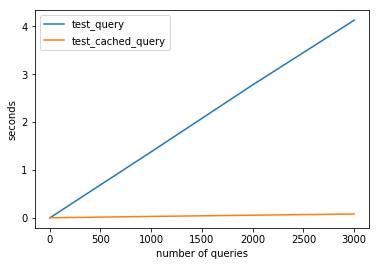

In [26]:
import timeit as timeit
import matplotlib.pyplot as plt
%matplotlib inline
X = [1, 10, 100, 1000, 2000, 3000]
a = []
b = []
for i in X:
    result = %timeit -o test_query(conn, sql_query, i)
    a.append(result.average)
    result = %timeit -o test_cached_query(conn, i)
    b.append(result.average)     
    
plt.plot(X, a, label = 'test_query')
plt.plot(X, b, label = 'test_cached_query')
plt.xlabel('number of queries')
plt.ylabel('seconds')
plt.legend()

**Task 6.1** What do the performance curves tell you about the use of temporary tables in this example? Are there any trade-offs? (you may need adjust the range of values of `X` and this code a few times to get a good feel for the situation)

```
### BEGIN SOLUTION
When number is extremely small, the speed of temporary tables is even slow than the speed of common query. But when number is increaing, the speed of temporary tables will be much faster than common query.

Trade-offs:
Although using temporary tables is quicker than using permanent tables, we cannot update in functions. To be specific, we can not use INSERT, UPDATE or DELETE statements against temporary tables in user-defined functions. Beseide, temporary tables cannot be rolled back, which need to drop and create. What's more, temporary tables are considered as regular database object, in terms of transaction handling and performance, therefore using many temporary tables in your stored procedures can lead to very poor database performance.

### END SOLUTION
```

### Indexing


The next three functions create and exercise a toy database called test.db.
* `setup_test_db` creates a table  
* `insert_test` performs `num` SQL `INSERT`s into the table
* `select_test` does `num` SQL `SELECT`s.  

In [27]:
import numpy as np
def setup_test_db(conn):
    conn.execute('DROP TABLE IF EXISTS scripts')
    conn.execute('''
            CREATE TABLE scripts (
                script_id INTEGER,
                author_name text,
                script_name text,
                author_facebook_likes int,
                PRIMARY KEY(script_id))
                ''')
    conn.commit()
    return conn


def insert_test(conn, setup_db, num):
    '''create a test base with setup_db, do num inserts to it'''
    setup_db(conn)
    c = conn.cursor()
    for i in range(num):
        c.execute('''INSERT INTO scripts (script_name, author_facebook_likes) VALUES (?,?)''', (f"Dr. Who #{i*2}", np.random.randint(1e6)))
    conn.commit()

def select_test(conn, num):
    '''do num selects from the test database'''
    c = conn.cursor()
    for i in range(num):
        c.execute('''SELECT author_facebook_likes 
                     FROM scripts
                     WHERE script_name = ?''', (f"Dr. Who #{i}",))

Below is some code for benchmarking this database.  Run it to see how well the database currently performs.

In [28]:
conn = sqlite3.connect('test.db')

In [29]:
%timeit -n 3 -r 3 insert_test(conn, setup_test_db, 15000)

62.8 ms ± 1.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [30]:
%timeit -n 3 -r 3 select_test(conn, 1500) 

685 ms ± 2.92 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### Adding an Index
We can optimize the database so that `test_select` test performs more quickly by adding an index to the field that is being used for matching.

See [here](http://www.sqlitetutorial.net/sqlite-index/) for some information on  `INDEX` and `CREATE INDEX`.

In [31]:
def setup_test_db_with_index(conn):
    conn.execute('DROP TABLE IF EXISTS scripts')
    conn.execute('''
            CREATE TABLE scripts (
                script_id INTEGER,
                author_name text,
                script_name text,
                author_facebook_likes int,
                PRIMARY KEY(script_id))
                ''')
    conn.execute('''CREATE INDEX IF NOT EXISTS script_name_index ON scripts(script_name)''')
    conn.commit()
    return conn

Run the following code to see how your optimization performs.

In [32]:
conn = sqlite3.connect('test.db')
conn_with_index = sqlite3.connect('test_with_index.db')

N = 15000 # number of inserts to do
%timeit -n 3 -r 3 insert_test(conn, setup_test_db, N)
%timeit -n 3 -r 3 insert_test(conn_with_index, setup_test_db_with_index, N)

65 ms ± 1.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
86.3 ms ± 3.5 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [33]:
N = 1500 # number selects to do
%timeit -n 3 -r 3 select_test(conn, N) 
%timeit -n 3 -r 3 select_test(conn_with_index, N) 

683 ms ± 5.22 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)
23.1 ms ± 270 µs per loop (mean ± std. dev. of 3 runs, 3 loops each)


**Task 6.2**: Explain the performance changes you see.  Have any trade-offs been made in speed?  How about in the file size of test.db and test_with_index.db? 

Hint: https://use-the-index-luke.com/This is an amusing website where you can learn about the technology when indexing.

`### BEGIN SOLUTION`
The performance changes: Adding index will lead to more time creating tables, but when we do some querys, such as SELECT, the time will be much shorter compared with do such things in database without index.

Trade-offs:
Although using index can make searching in the database much faster, the index itself occupies space on disk and memory, so, if space or memory are issues then too many indexes could be a problem. Besides, when data is inserted/updated/deleted, then the index needs to be maintained as well as the original data, which slows down updates. It means that if there are too many indexes, then data modifications would slow down(However, if data is static, this won't be an issue).

The size of test_with_index.db is about 774kb which is larger than test.db(410kb)


`### END SOLUTION`